# Inland water good Thousand tonnes - Germany (1982-2022)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_table("Databases/Inland_water_good_Thousan_tonnes.tsv")
data = data.drop(data.columns[[1,2,3,4,5]], axis=1)
data.head()

,Time,Germany
0,1982,221.899
1,1983,223.936
2,1984,236.478
3,1985,222.408
4,1986,229.494


<AxesSubplot:xlabel='Time'>

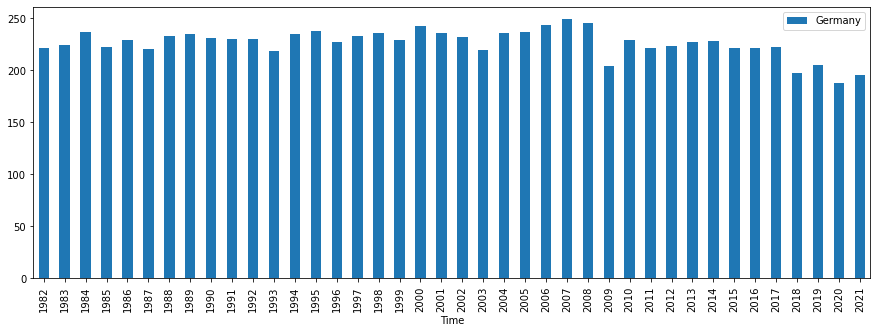

In [2]:
data.plot(kind="bar", x="Time", y="Germany", rot=90, figsize=(15,5))

Data length: 27


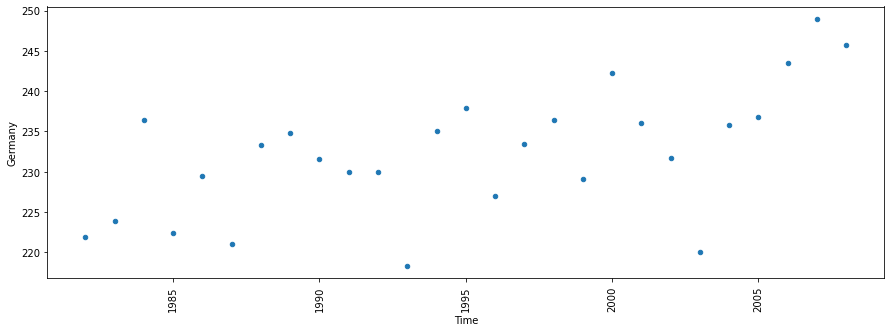

In [3]:
data1982_2008 = data[data.Time < 2009]
data1982_2008 = data1982_2008.reset_index(drop=True)
data1982_2008.plot(kind="scatter", x="Time", y="Germany", rot=90, figsize=(15,5))
print("Data length: {}".format(len(data1982_2008)))

Data length: 12


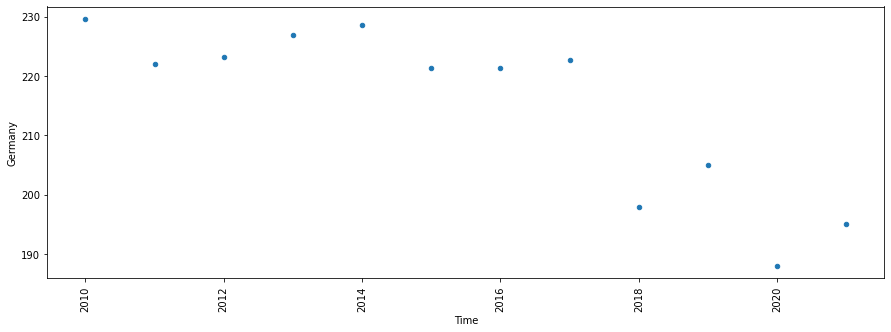

In [4]:
data2008_2022 = data[data.Time > 2009]
data2008_2022 = data2008_2022.reset_index(drop=True)
data2008_2022.plot(kind="scatter", x="Time", y="Germany", rot=90, figsize=(15,5))
print("Data length: {}".format(len(data2008_2022)))

In [5]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def plotPolynomialRegression(dtframe, initialOrder, finalOrder, predList):
    X = dtframe.index
    Y = dtframe["Germany"].values
    
    for i, pred in enumerate(predList):
        predList[i] = pred + len(dtframe) - 1
        
    y, MAE, orders, yPred = [], [], range(initialOrder, finalOrder + 1), []
    for order in orders:
        model = np.poly1d(np.polyfit(X, Y, order))
        for pred in predList:
            yPred += [model(pred)]
        y += [model(X)]
    
    plt.figure(figsize=(18.5, 10.5))
    plt.subplots_adjust(hspace=0.5)
    
    nrows = len(orders) // 2 + (len(orders) % 2 > 0)
    ite = 0
    
    for i, order in enumerate(orders):
        ax = plt.subplot(nrows, 2, i + 1)
        ax.scatter(X,Y)
        for pred in predList:
            ax.scatter(pred, yPred[ite], color='yellow')
            ite += 1
        ax.plot(X,y[i], color='red')
        ax.set_title('{}-order function'.format(order))
    
    plt.show()
    
    print("Dataset Lenght: {}\n".format(len(dtframe) - 1))
    
    ite = 0
    for i, order in enumerate(orders):
        print("Mean Absolute Error ({}-order function) = {:0.4f}".format(order, mean_absolute_error(Y, y[i])))
        print("Mean Squared Error ({}-order function) = {:0.4f}".format(order, np.sqrt(mean_squared_error(Y, y[i]))))
        print("R2 Score ({}-order function) = {:0.4f}".format(order, r2_score(Y, y[i])))
        for pred in predList:
            print("Predicting {} ({}-order function) = {:0.4f}".format(pred, order, yPred[ite]))
            ite += 1
        print("\n")

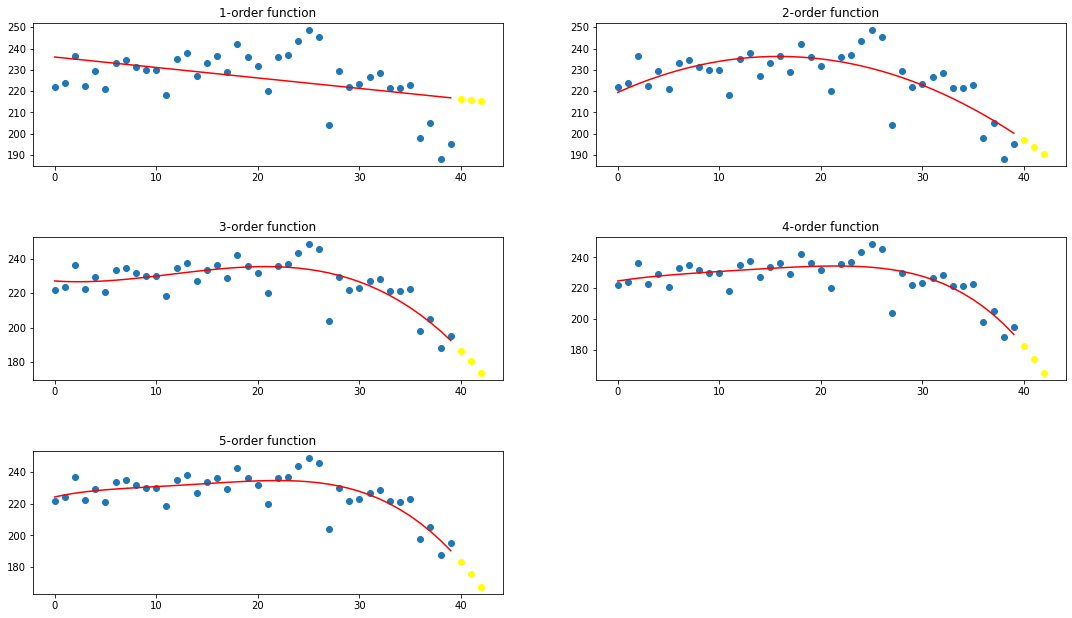

Dataset Lenght: 39

Mean Absolute Error (1-order function) = 9.0954
Mean Squared Error (1-order function) = 11.8460
R2 Score (1-order function) = 0.1867
Predicting 40 (1-order function) = 216.3789
Predicting 41 (1-order function) = 215.8873
Predicting 42 (1-order function) = 215.3956


Mean Absolute Error (2-order function) = 6.5627
Mean Squared Error (2-order function) = 8.7289
R2 Score (2-order function) = 0.5584
Predicting 40 (2-order function) = 197.0759
Predicting 41 (2-order function) = 193.7595
Predicting 42 (2-order function) = 190.3085


Mean Absolute Error (3-order function) = 6.0133
Mean Squared Error (3-order function) = 8.0401
R2 Score (3-order function) = 0.6253
Predicting 40 (3-order function) = 186.6266
Predicting 41 (3-order function) = 180.2518
Predicting 42 (3-order function) = 173.3784


Mean Absolute Error (4-order function) = 5.9050
Mean Squared Error (4-order function) = 7.9682
R2 Score (4-order function) = 0.6320
Predicting 40 (4-order function) = 182.4927
Predi

In [6]:
plotPolynomialRegression(data, 1, 5, [1, 2, 3])

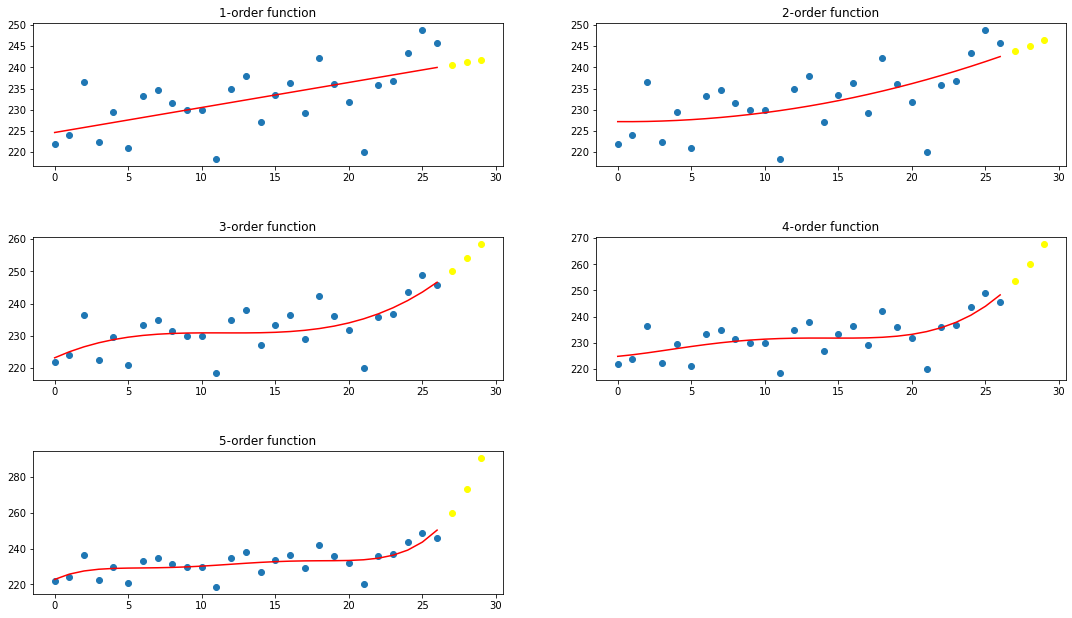

Dataset Lenght: 26

Mean Absolute Error (1-order function) = 4.7870
Mean Squared Error (1-order function) = 6.2193
R2 Score (1-order function) = 0.3539
Predicting 27 (1-order function) = 240.5989
Predicting 28 (1-order function) = 241.1898
Predicting 29 (1-order function) = 241.7808


Mean Absolute Error (2-order function) = 4.9552
Mean Squared Error (2-order function) = 6.0856
R2 Score (2-order function) = 0.3814
Predicting 27 (2-order function) = 243.8050
Predicting 28 (2-order function) = 245.0829
Predicting 29 (2-order function) = 246.4082


Mean Absolute Error (3-order function) = 4.3362
Mean Squared Error (3-order function) = 5.7740
R2 Score (3-order function) = 0.4431
Predicting 27 (3-order function) = 250.1596
Predicting 28 (3-order function) = 254.1610
Predicting 29 (3-order function) = 258.6793


Mean Absolute Error (4-order function) = 4.3866
Mean Squared Error (4-order function) = 5.7178
R2 Score (4-order function) = 0.4539
Predicting 27 (4-order function) = 253.6573
Predic

In [7]:
plotPolynomialRegression(data1982_2008, 1, 5, [1, 2, 3])

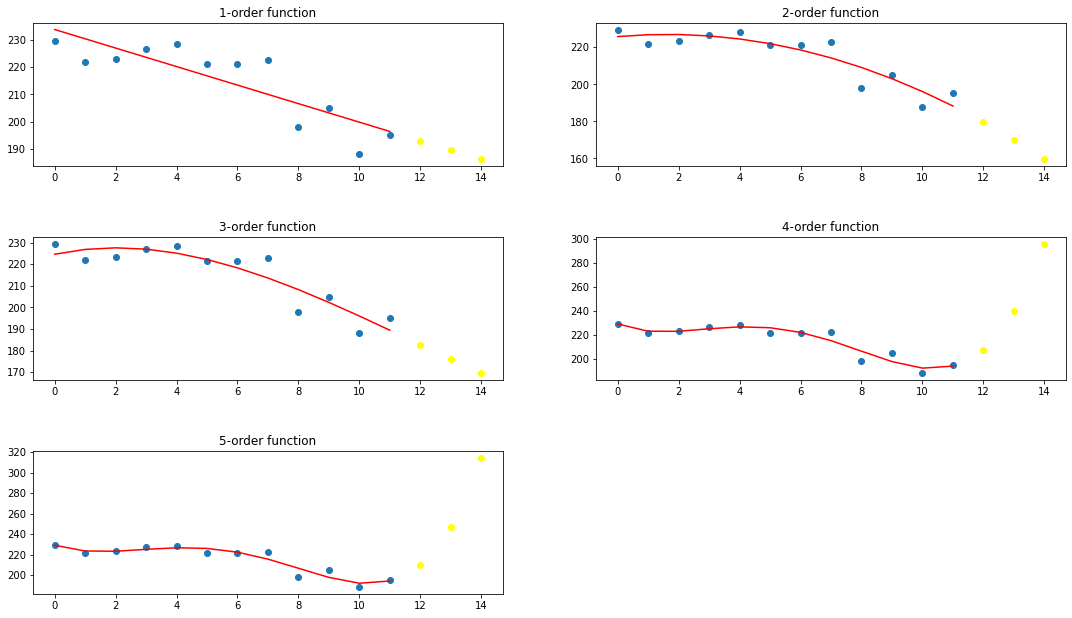

Dataset Lenght: 11

Mean Absolute Error (1-order function) = 6.4097
Mean Squared Error (1-order function) = 7.3507
R2 Score (1-order function) = 0.7189
Predicting 12 (1-order function) = 193.0001
Predicting 13 (1-order function) = 189.5946
Predicting 14 (1-order function) = 186.1891


Mean Absolute Error (2-order function) = 4.7506
Mean Squared Error (2-order function) = 5.6937
R2 Score (2-order function) = 0.8314
Predicting 12 (2-order function) = 179.6279
Predicting 13 (2-order function) = 170.0506
Predicting 14 (2-order function) = 159.5917


Mean Absolute Error (3-order function) = 4.7913
Mean Squared Error (3-order function) = 5.6492
R2 Score (3-order function) = 0.8340
Predicting 12 (3-order function) = 182.7496
Predicting 13 (3-order function) = 176.0538
Predicting 14 (3-order function) = 169.5055


Mean Absolute Error (4-order function) = 3.2701
Mean Squared Error (4-order function) = 4.3894
R2 Score (4-order function) = 0.8998
Predicting 12 (4-order function) = 207.8040
Predic

In [8]:
plotPolynomialRegression(data2008_2022, 1, 5, [1, 2, 3])